In [1]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
from sklearn import model_selection
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

C:\Users\rodelga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_root_dir = r'D:\CIC\Train and Test\Orginal'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()


# 'n_estimators' is equal to the numebr of trees
adaBoost = AdaBoostClassifier(n_estimators=100)
adaBoost.fit(X_train, y_train)

predictions = adaBoost.predict(X_test)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

print(f"Total time: {endTime - startTime:0.4f} seconds \n")

Total time: 12555.8857 seconds 



In [4]:
results = confusion_matrix(y_test, predictions)
error = zero_one_loss(y_test, predictions)
score = accuracy_score(y_test, predictions) * 100
report = classification_report(y_test, predictions)


In [5]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("AdaBoost Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{results[0]}")
print(f"{results[1]} \n")

print("Report :")
print(report) 

print(f"True Postive   : {results[0][0]}")
print(f"False Positive : {results[0][1]}")
print(f"False Negative : {results[1][0]}")
print(f"True Negative  : {results[1][1]}")
print(f"Error Value    : {error}")
print(f"Accuracy_Score : {score}")
print("=================================================")

Total time: 12555.8857 seconds 

AdaBoost Classifier Results
Confusion Matrix:
[3997568   19102]
[ 50553 773950] 

Report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   4016670
           1       0.98      0.94      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.98      0.97      0.97   4841173
weighted avg       0.99      0.99      0.99   4841173

True Postive   : 3997568
False Positive : 19102
False Negative : 50553
True Negative  : 773950
Error Value    : 0.014388041906372662
Accuracy_Score : 98.56119580936273


In [6]:
X_test.shape

(4841173, 79)

In [7]:
feature_importances = pd.Series(adaBoost.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(100)

Feature importances sorted:
---------------------------------


Init Fwd Win Byts    0.28
Dst Port             0.08
Flow IAT Mean        0.07
Fwd Seg Size Min     0.04
Init Bwd Win Byts    0.04
TotLen Fwd Pkts      0.04
Flow IAT Min         0.04
Fwd Header Len       0.03
Bwd IAT Max          0.03
Fwd Pkt Len Std      0.03
Bwd Pkt Len Max      0.03
Bwd Pkt Len Std      0.02
Fwd Pkts/s           0.02
Fwd IAT Min          0.02
Bwd Pkts/s           0.02
Fwd Pkt Len Max      0.02
Flow Duration        0.02
Bwd Pkt Len Mean     0.01
Idle Mean            0.01
Subflow Bwd Byts     0.01
Subflow Fwd Byts     0.01
Bwd Seg Size Avg     0.01
Fwd Seg Size Avg     0.01
ECE Flag Cnt         0.01
ACK Flag Cnt         0.01
Flow Byts/s          0.01
Pkt Len Max          0.01
Bwd IAT Min          0.01
Idle Min             0.01
Fwd Pkt Len Mean     0.01
Fwd IAT Tot          0.01
Fwd IAT Std          0.01
Fwd IAT Max          0.01
Flow IAT Max         0.01
Fwd Byts/b Avg       0.00
Fwd Pkts/b Avg       0.00
Fwd Blk Rate Avg     0.00
Bwd Byts/b Avg       0.00
Bwd Pkts/b A

Top 40 features:
---------------------------------
Init Fwd Win Byts    0.28
Dst Port             0.08
Flow IAT Mean        0.07
TotLen Fwd Pkts      0.04
Flow IAT Min         0.04
Init Bwd Win Byts    0.04
Fwd Seg Size Min     0.04
Fwd Pkt Len Std      0.03
Bwd Pkt Len Max      0.03
Bwd IAT Max          0.03
Fwd Header Len       0.03
Flow Duration        0.02
Fwd Pkt Len Max      0.02
Bwd Pkt Len Std      0.02
Fwd IAT Min          0.02
Fwd Pkts/s           0.02
Bwd Pkts/s           0.02
Fwd Pkt Len Mean     0.01
Bwd Pkt Len Mean     0.01
Flow Byts/s          0.01
Flow IAT Max         0.01
Fwd IAT Tot          0.01
Fwd IAT Std          0.01
Fwd IAT Max          0.01
Bwd IAT Min          0.01
Pkt Len Max          0.01
ACK Flag Cnt         0.01
ECE Flag Cnt         0.01
Fwd Seg Size Avg     0.01
Bwd Seg Size Avg     0.01
Subflow Fwd Byts     0.01
Subflow Bwd Byts     0.01
Idle Mean            0.01
Idle Min             0.01
Protocol             0.00
Timestamp            0.00
Tot Fwd Pkts 

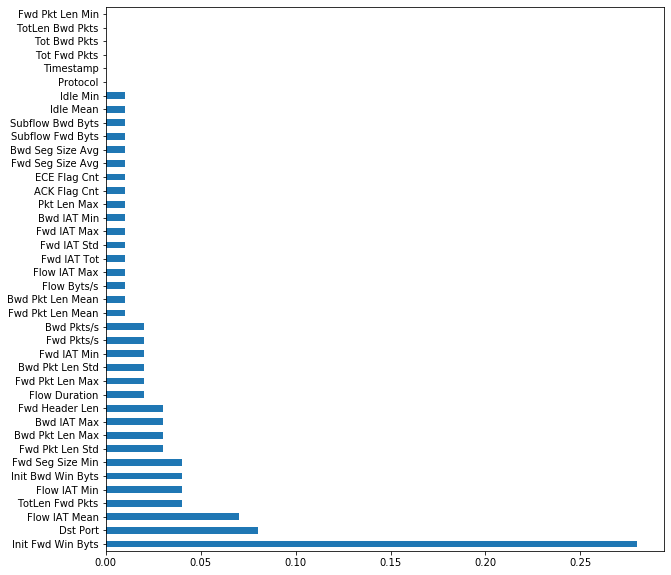

In [8]:
print('Top 40 features:')
print('---------------------------------')
feature_importances.nlargest(40).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(40))

Least 40 features:
---------------------------------
Protocol             0.0
Timestamp            0.0
Tot Fwd Pkts         0.0
Tot Bwd Pkts         0.0
TotLen Bwd Pkts      0.0
Fwd Pkt Len Min      0.0
Bwd Pkt Len Min      0.0
Flow Pkts/s          0.0
Flow IAT Std         0.0
Fwd IAT Mean         0.0
Bwd IAT Tot          0.0
Bwd IAT Mean         0.0
Bwd IAT Std          0.0
Fwd PSH Flags        0.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Bwd Header Len       0.0
Pkt Len Min          0.0
Pkt Len Mean         0.0
Pkt Len Std          0.0
Pkt Len Var          0.0
FIN Flag Cnt         0.0
SYN Flag Cnt         0.0
RST Flag Cnt         0.0
PSH Flag Cnt         0.0
URG Flag Cnt         0.0
CWE Flag Count       0.0
Down/Up Ratio        0.0
Pkt Size Avg         0.0
Fwd Byts/b Avg       0.0
Fwd Pkts/b Avg       0.0
Fwd Blk Rate Avg     0.0
Bwd Byts/b Avg       0.0
Bwd Pkts/b Avg       0.0
Bwd Blk Rate Avg     0.0
Subflow Fwd Pkts     0.0
Subflow Bwd Pkts     0

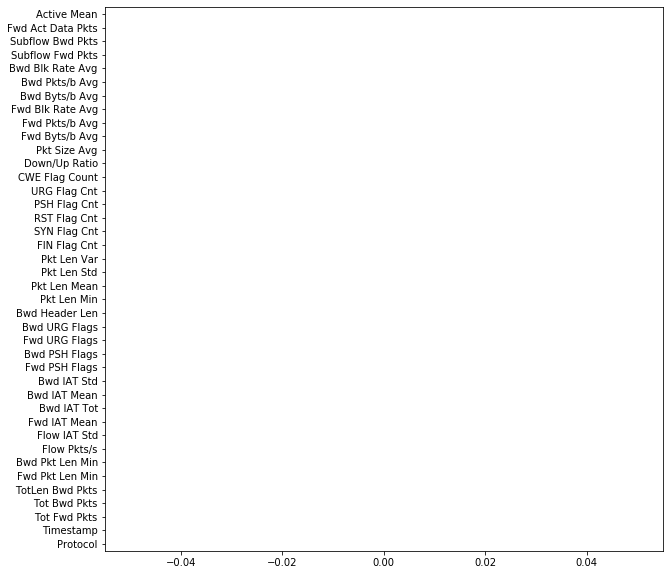

In [9]:
print('Least 40 features:')
print('---------------------------------')
feature_importances.nsmallest(40).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(40))